In [2]:
import torch 
x=torch.tensor([[1.0, 0.1, 0.1, 0.1],
              [0.1, 3.0, 0.2, 0.3],
              [0.1, 0.2, 5.0, 0.5],
              [0.1, 0.3, 0.5, 9.0]],dtype=torch.float64)
x

tensor([[1.0000, 0.1000, 0.1000, 0.1000],
        [0.1000, 3.0000, 0.2000, 0.3000],
        [0.1000, 0.2000, 5.0000, 0.5000],
        [0.1000, 0.3000, 0.5000, 9.0000]], dtype=torch.float64)

In [3]:
c,_=torch.linalg.eig(x)
c

tensor([9.0803+0.j, 0.9923+0.j, 4.9539+0.j, 2.9734+0.j],
       dtype=torch.complex128)

In [33]:
torch.manual_seed(42)
k=5
v_in=torch.randn(k,1,dtype=torch.float64)
A=torch.randn(k,k,dtype=torch.float64)

v_in,A

(tensor([[ 0.3367],
         [ 0.1288],
         [ 0.2345],
         [ 0.2303],
         [-1.1229]], dtype=torch.float64),
 tensor([[-1.7903, -1.7484,  0.3553, -0.1611, -0.4175],
         [-0.8958,  1.7146, -0.8213,  1.7342, -0.6641],
         [ 0.6551,  0.6285, -1.2405, -0.3207,  1.9312],
         [ 0.1453, -0.6427,  0.3009, -0.2869,  0.6076],
         [ 0.6058,  1.3110, -0.2267, -0.2120,  0.5718]], dtype=torch.float64))

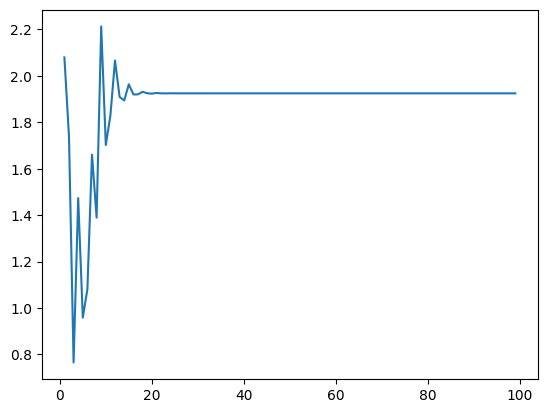

In [34]:
import matplotlib.pyplot as plt
norm_list=[torch.norm(v_in).item()]
for i in range(1,100):
    v_in=A @ v_in
    norm_list.append(torch.norm(v_in).item())
norm_list_ratio=[]
for i in range(1,100):
    list_ratio=(norm_list[i])/(norm_list[i-1])
    norm_list_ratio.append(list_ratio)
plt.plot(list(range(1,100,1)),norm_list_ratio)
plt.show()

In [35]:
eigs=torch.linalg.eig(A).eigenvalues.tolist()
norm_eigs=[torch.abs(torch.tensor(x)) for x in eigs]
norm_eigs.sort()
print(f"norm of eigenvalues : {norm_eigs}")

norm of eigenvalues : [tensor(1.0427), tensor(1.1287), tensor(1.1287), tensor(1.2049), tensor(1.9248)]


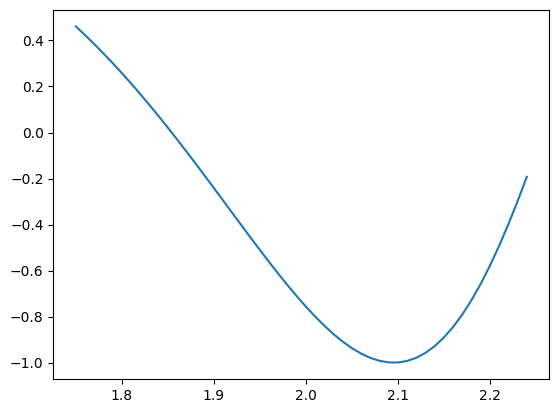

In [48]:
torch.pi= torch.acos(torch.zeros(1)).item() * 2
x_big=torch.arange(1.75,2.25,0.01)
ys=torch.sin(x_big**x_big)
plt.plot(x_big, ys)

In [ ]:
xs=torch.arange(-torch.pi,torch.pi,0.01)
plot=[torch.sin(xs)]

for x0 in [-1.5,0,2]:
    plot.append(torch.sin(torch.tensor(x0))+ (torch.tensor()))


In [63]:
scores=torch.randint(1,10,(2,3),dtype=torch.float16)
print(f"{ scores }\n")
subject_average=scores.mean(dim=0)
student_average=scores.mean(dim=1)
print(subject_average,"\n",student_average)

tensor([[2., 8., 2.],
        [6., 1., 5.]], dtype=torch.float16)

tensor([4.0000, 4.5000, 3.5000], dtype=torch.float16) 
 tensor([4., 4.], dtype=torch.float16)


In [3]:
import numpy as np
def sample_mask(shape, p=0.0015, p_noise=0.05, max_seq=1, min_seq=1, rng=None): 
    if rng is None:
        rand = np.random.random
        randint = np.random.randint
    else:
        rand = rng.random
        randint = rng.integers
    mask = rand(shape) < p 
    print(mask[:,:5])
    for col in range(mask.shape[1]): 
        idxs = np.flatnonzero(mask[:, col]) 
        if not len(idxs):
            continue
        fault_len = min_seq
        if max_seq > min_seq:
            fault_len = fault_len + int(randint(max_seq - min_seq)) 
        idxs_ext = np.concatenate([np.arange(i, i + fault_len) for i in idxs]) #
        idxs = np.unique(idxs_ext)
        idxs = np.clip(idxs, 0, shape[0] - 1)
        mask[idxs, col] = True
    mask = mask | (rand(mask.shape) < p_noise)
    return mask.astype('uint8') 

In [ ]:
sample_mask(shape=(5,10), p=0.1, p_noise=0.05, max_seq=3, min_seq=2)

[[False False False False False]
 [ True False False False False]
 [False False False False False]
 [False False  True False False]
 [False False  True False False]
 [False False  True False False]
 [False False False  True False]
 [False False  True False False]
 [False  True False False False]
 [False False False False False]
 [ True False False False False]
 [False False False False False]
 [False False False False False]
 [False  True False False False]
 [False False False False  True]
 [False False False False False]
 [False False False  True False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [ True  True False False  True]
 [False False False False False]
 [False False False False  True]
 [ True False False False False]
 [ True False False False False]
 [ True False False False  True]
 [False False  True False False]
 [False  True False False False]
 [False False False False False]
 [False False False False False]
 [False Fa

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1,